## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(heart_disease)

303

## Splitting the data

In [5]:
#Setting up random seed
np.random.seed(42)

#Make data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Trying out various Models

### `Linear SVC`

In [6]:
from sklearn.svm import LinearSVC

clf = LinearSVC(max_iter = 10000)
clf.fit(X_train, y_train)

#Getting model score
clf.score(X_test, y_test)

C:\Users\teja1\DSProjects\Heart-Disease-Prediction\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

### `Random Forest Classifier`

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Instantiating the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Getting model score
clf.score(X_test, y_test)

0.8524590163934426

## Making predictions

In [8]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [9]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

## Comparing predictions to the truth values to evaluate the model

In [10]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

## Making predictions using `predict_proba()`

#### `predict_proba()` returns probabilities of a classification label

In [11]:
clf.predict_proba(X_test[:5]) #Returning just the first five

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82]])

#### Here, we're getting labels as either `0` or `1`

In [12]:
#Predicting on the same data for the first five
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

## Evaluating model using `scoring` parameter

### `cv` indicates the number of times cross-validation has to be done

If `cv = k` and the test size is `x`, the function will create `k` samples of `x` sized test data and perform cross-validation
on all of them.

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [14]:
#Increasing the cv size

cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.83333333])

In [15]:
cross_val_score(clf, X, y, cv=15)

array([0.9047619 , 0.85714286, 0.76190476, 0.8       , 0.95      ,
       0.95      , 0.85      , 0.8       , 0.75      , 0.85      ,
       0.85      , 0.85      , 0.7       , 0.8       , 0.75      ])

In [16]:
#Taking the mean of all 15 cross-validation sets

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=15))

### Though cross-validation score is slightly lower than single test score, it's best showcase that as model's accuracy

In [17]:
#Comparing single score and cross-validation score

clf_cross_val_score, clf.score(X_test, y_test)

(0.8247619047619048, 0.8524590163934426)

### Using ROC Curve

ROC curves are comparison of a model's true positive rate (tpr) vs false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [18]:
from sklearn.metrics import roc_curve

#Make predictions with probablities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.37, 0.63],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.46, 0.54]])

In [19]:
y_probs_positive = y_probs[:, 1] #Getting only the 2nd column
y_probs_positive[:10]

array([0.11, 0.51, 0.56, 0.16, 0.82, 0.86, 0.63, 0.05, 0.01, 0.54])

#### Calculating `tpr`, `fpr` and `thresholds` 

In [20]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

In [21]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.13793103, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.27586207, 0.4137931 , 0.44827586, 0.65517241, 0.72413793,
       0.72413793, 0.82758621, 1.        ])

### Plotting the ROC curve

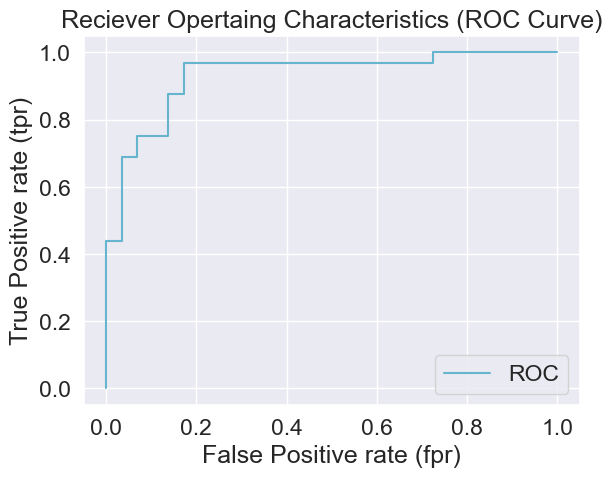

In [22]:
def plot_roc_curve(fpr, tpr):
    #Plot the ROC curve
    plt.plot(fpr, tpr, color="c", label="ROC")
    
    #Plot line with no predictive power(baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Reciever Opertaing Characteristics (ROC Curve)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9310344827586207

### Confusion Matrix

#### Compare the lables in a model that it predicted with the actual values

The elements of principle diagonal are correctly predicted

      | 0   1   <--- Predicted Label
      --------
    0 | a   b
    1 | c   d
    
    ^
    |
    True Label 

* `a` --> (0, 0) (Correct)
* `d` --> (1, 1) (Correct)

* `b` --> Number of false positives
* `c` --> Number of false negatives

In [24]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,   y_preds)
               #TrueLabel, PredictedLabel

array([[24,  5],
       [ 4, 28]], dtype=int64)

### Visual representation of Confusion Matrix

<Axes: >

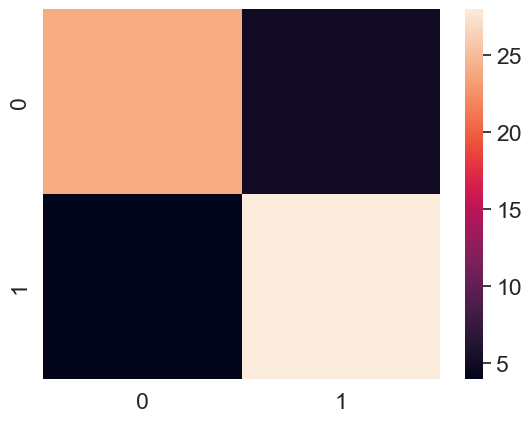

In [27]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)